In [1]:
import numpy as np
import scipy as sp
from sympy import Symbol, Poly, exp, integrate
import sys
import matplotlib.pyplot as plt
import resource
from IPython.display import display

from ggqpy.functionfamiliy import Interval, FunctionFamily
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff
from ggqpy.optimize import QuadOptimizer
from ggqpy import construct_Chevyshev_quadratures

resource.setrlimit(resource.RLIMIT_STACK, [0x10000000, resource.RLIM_INFINITY])
sys.setrecursionlimit(0x100000)

In [36]:
eps_disc = 1e-15
eps_comp = 1e2*eps_disc
I = Interval(-1,1)
seed = 0

x = Symbol("x")

F = FunctionFamily(I, [1 + 1e-100*x] + [x**k for k in range(1,3)] + [1e4*1j*x**k for k in range(10,30)] + [exp(1j*k*x*np.random.normal(scale=0.01)) for k in range(1,10)])
ex_f, ex_f_expr = F.generate_example_function()
display(ex_f_expr)

7928.79099976228*I*x**29 - 21401.5791951224*I*x**28 - 6095.72722835169*I*x**27 + 10618.5762879944*I*x**26 + 910.201196725865*I*x**25 - 8524.05263502517*I*x**24 + 6879.32222146692*I*x**23 - 28.9133387987166*I*x**22 - 11962.0333975952*I*x**21 + 11487.0272858189*I*x**20 + 11049.7800419781*I*x**19 + 8571.2253644284*I*x**18 + 14378.6689434661*I*x**17 + 12353.7059790362*I*x**16 - 737.620540138946*I*x**15 - 3704.65967920382*I*x**14 - 7742.3026918434*I*x**13 + 7937.82901952932*I*x**12 - 486.654930128948*I*x**11 + 9657.00695921409*I*x**10 + 0.52158185546885*x**2 + 0.171872994640461*x - 1.27175688087732*exp(0.00328273396063677*I*x) + 1.42114970008009*exp(0.0114878741272881*I*x) + 1.75262342534687*exp(0.0121605760651367*I*x) - 1.35001541856909*exp(0.0131683127702912*I*x) - 0.23144698118888*exp(0.0190341181413594*I*x) - 1.34688399581053 - 0.465965580121968*exp(-0.0618428151350046*I*x) - 0.32782373077023*exp(-0.0509183398479256*I*x) - 0.238663314940559*exp(-0.0042068746637065*I*x) - 0.6480523705153

In [37]:
number_of_points = 100
disc = Discretizer(eps_disc, min_length=1e-4, interpolation_degree=number_of_points) 
x_disc, w_disc, endpoints, intervals = disc.adaptive_discretization(F)

In [38]:
U_disc, A, rank, u_list = compress_sequence_of_functions(F, x_disc, w_disc, eps_comp, number_of_points, intervals)

In [40]:
x_cheb,w_cheb,idx_cheb = construct_Chevyshev_quadratures(x_disc,w_disc,U_disc)
print(ex_f(x_cheb)@w_cheb - complex(F.target_integral(ex_f_expr)))
print(complex(F.target_integral(ex_f_expr)))
print(w_cheb)

(-1.1599610161283636e-12-2.446540747769177e-10j)
(-5.065108738385156+4558.835122688168j)
[0.00412168-2.42217109e-07j 0.0040445 -2.57497170e-07j
 0.01695279+6.83919439e-07j 0.01717322+7.27555159e-07j
 0.02795476-1.14973844e-06j 0.02831135-1.07918951e-06j
 0.0405076 +1.58291751e-06j 0.03999841+1.48226785e-06j
 0.05064987-1.91745732e-06j 0.04995452-2.05471691e-06j
 0.06249885+2.57851045e-06j 0.06156609+2.39476247e-06j
 0.06834304-3.13125925e-06j 0.06957647-2.88902305e-06j
 0.08563152+3.52363820e-06j 0.0840856 +3.22145705e-06j
 0.10559331-3.97021781e-06j 0.10332335-4.40985192e-06j
 0.10698901+7.05201650e-06j 0.1024694 +6.19290625e-06j
 0.13447043-1.07751625e-05j 0.12287749-1.28710619e-05j
 0.18569181+1.83806777e-05j 0.19395251+1.65151412e-05j
 0.23326241-1.95883768e-05j]


In [6]:
r = U_disc.T@w_disc
eps_quad = 0.9
opt = QuadOptimizer(u_list,r)
opt.set_parameters(0.3,1000,10e-6)
x,w = opt.point_reduction(x_cheb,w_cheb,eps_quad)


ValueError: `x0` must be real.

[0.34226685 0.21488058]


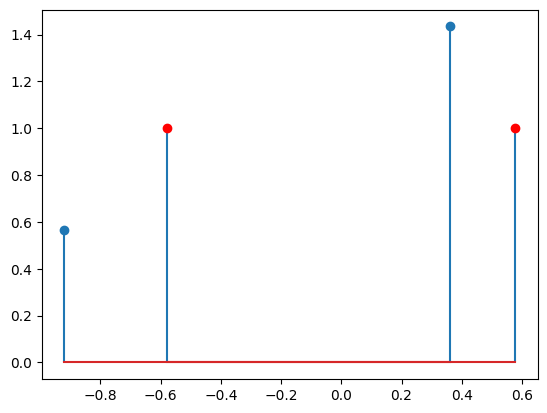

In [ ]:
x_gl,w_gl = np.polynomial.legendre.leggauss(len(x))
plt.stem(x_gl,w_gl,markerfmt="r")
plt.stem(x,w)
print(x_gl-sorted(x))